**Introducción a la flexión usando Python**
------------------------------------------------------------------------------
***


Una viga metálica de longitud L = 1 m está apoyada en los puntos A y B. La carga uniforme sobre la viga (incluido su peso) es $q = 24$ kN/m. Además, sobre el punto A se ejerce un momento de $T = 2$ kNm. La sección transversal de la viga es rectangular con ancho $b = 25$ mm y altura $h = 200$ mm. 
* a)	Obtenga las leyes de esfuerzos (cortante y flector) en la viga y dibuje los diagramas de esfuerzos correspondientes, indicando los puntos más desfavorables.
* b)	Obtenga la ecuación de la deflexión (suponiendo E*I conocido) mediante el método de la doble integración. Encuentre el punto de máxima deflexión.
* c)	Para la sección situada en x= 0.9 m, calcule el momento flector y el esfuerzo cortante. 
* d)	Para la sección situada en x= 0.9 m, determine las tensiones normal σ y tangencial τ en un punto C situado a una altura y = 50 mm del centro de la viga.
* e)	Muestre estas tensiones en un croquis de un elemento de tensión en el punto del apartado anterior (x=0.9 m, y=50 mm).
* f)	Determine las tensiones máximas de tracción, compresión y tangencial en dicho punto y muestre las tensiones en croquis de elementos de tensión apropiadamente orientados.
* g)	Repita los apartados d), e) y f) considerando una sección en T con $b=150$ mm, $h= 200$ mm y $e=e_1=30$ mm
* h)	Indique razonadamente cómo se verían modificados los apartados anteriores si:
    + a.	Se aplica un esfuerzo horizontal en el punto B. No es necesario volver a realizar los cálculos.
    + b.	El ancho (b) de la sección en la mitad izquierda de la viga (hasta x=0.5 m) se reduce. No es necesario volver a realizar los cálculos.


Nota para el criterio de signos: Todas las reacciones y solicitaciones se consideran positivos en dirección positiva de los ejes cartesianos.

**Resolución:**
------------------------------------------------------------------------------

**Cálculo del diagrama de esfuerzos**

Vamos a obtener primero las expresiones de los esfuerzos.

In [ ]:
from sympy import *             # Librería para trabajo simbólico
import math                     # Librería para utilizar símbolos matemáticos como el número pi, que se escribe como math.pi
import numpy as np              # Librería para poder trabajar con matrices y vectores
import matplotlib.pyplot as plt # Librería para poder dibujar gráficas

x=symbols('x') #variable simbólica coordenada x
R0y,R1y=symbols('R0y R1y')
M0z,M1z=symbols('M0z M1z')

A1,B1=symbols('A1 B1')


T0=2000.0 #Nm  el par en x=0

#cargas distribuidas (positivas en sentido +y)
qq01=-24000 #N/m la carga distribuida entre los puntos 0 y 1 (entre x=0 y x=L1)

#geometría
L1=1.0 
L=L1 #longitud total

#material
E=1.0e4
I=2.0e1

#Cálculo estático. Añadir las ecuaciones ΣFy=0 y ΣMz=0 en la primera y segunda linea. Las reacciones que no participen
#en las ecuaciones (R0y,R1y,M0z,M1z) hay que añadirlas en las lineas de abajo
#Nota: Todas las reacciones y solicitaciones se consideran positivos en dirección positiva de los ejes cartesianos.
sol,=linsolve([  R0y+R1y+qq01*L,   #se pone todo positivo siempre
               R1y*L+qq01*L*L/2.0+T0,
              M0z,
              M1z,
             ], (R0y,R1y,M0z,M1z))

#reacciones
R0y=sol[0] #N reacción en y en x=0 
R1y=sol[1] #N reacción en y en x=L1 
M0z=sol[2] #Nm reacción momento en x=0 
M1z=sol[3] #Nm reacción momento en x=L1 


#-------------------------------------------------------------------------------------#
#------------------------------------- CÁLCULO  --------------------------------------#
#-------------------------------------------------------------------------------------#

#Definimos la carga distribuida
def q1(x):        
    return  qq01

#Definimos el cortante
VL=R0y #Este es el valor del cortante a la izquierda del tramo 1, lo que llamamos V+(x=0)
def cortante1(x):        
    return  integrate(q1(x), (x, 0, x)) + VL #esto quiere decir que integramos q(x) dandole a x limites entre 0 y x. 

#Definimos el flector
ML=-M0z-T0 #Este es el valor del flector a la izquierda del tramo 1, lo que llamamos M+(x=0)
def flector1(x):        
    return  integrate(cortante1(x), (x, 0, x)) + ML #en MPa 

V1=cortante1(x) 
M1=flector1(x)

print("ML es: ", ML)
print("La expresión del cortante en el tramo 1 es: ", V1)
print("La expresión del flector en el tramo 1 es: ", M1)


ML es:  -2000.00000000000
La expresión del cortante en el tramo 1 es:  14000.0 - 24000*x
La expresión del flector en el tramo 1 es:  -12000.0*x**2 + 14000.0*x - 2000.0


**Cálculo de la deflexión**

Para ello utilizaremos el método de la doble integración. Realizaremos las integrales analíticamente e impondremos las condiciones de contorno correspondientes para obtener las constantes de integración (para ello usaremos la función *linsolve*).

In [ ]:
#-------------------------------------------------------------------------------------#
#----------------------------- MÉTODO DOBLE INTEGRACIÓN ------------------------------#
#-------------------------------------------------------------------------------------#  

def giro1(x,A1):        
    return  integrate(flector1(x)/(E*I),x) + A1 #en MPa

def deflexion1(x,A1,B1):        
    return  integrate(giro1(x,A1),x) + B1 #en MPa

G1=giro1(x,A1) 
U1=deflexion1(x,A1,B1)
print("La expresión del giro en el tramo 1 es: ", G1)
print("La expresión de la deflexion en el tramo 1 es: ", U1)
print("")

#-------------------------------------------------------------------------------------#
#----------------------------------- C.C. ELÁSTICA -----------------------------------#
#-------------------------------------------------------------------------------------#    
  
G1_0=G1.subs([(x,0)])    #giro en tramo 1, punto 0
G1_1=G1.subs([(x,L1)])   #giro en tramo 1, punto 1


U1_0=U1.subs([(x,0)])    #deflexion en tramo 1, punto 0
U1_1=U1.subs([(x,L1)])   #deflexion en tramo 1, punto 1
 
    
sole,=linsolve([  U1_0,      #deflexion en tramo1, punto 0 es nula (apoyo)
                  U1_1       #deflexion en tramo1, punto 1 es nula (apoyo)
             ], (A1,B1))


G1_exp=G1.subs([(A1,sole[0])])
U1_exp=U1.subs([(A1,sole[0]),(B1,sole[1])])
print("Aplicadas las condiciones de contorno...")
print("La expresión del giro en el tramo 1 es: ", G1_exp)
print("La expresión de la deflexion en el tramo 1 es: ", U1_exp)
print("")


La expresión del giro en el tramo 1 es:  A1 - 0.02*x**3 + 0.035*x**2 - 0.01*x
La expresión de la deflexion en el tramo 1 es:  1.0*A1*x + B1 - 0.005*x**4 + 0.0116666666666667*x**3 - 0.005*x**2

Aplicadas las condiciones de contorno...
La expresión del giro en el tramo 1 es:  -0.02*x**3 + 0.035*x**2 - 0.01*x - 0.00166666666666667
La expresión de la deflexion en el tramo 1 es:  -0.005*x**4 + 0.0116666666666667*x**3 - 0.005*x**2 - 0.00166666666666667*x



**Representación gráfica**

 
El maximo cortante es:  [14000.] N
El maximo flector  es:  [2083.33299866] Nm
La máxima deflexión es:  [0.00094608] m


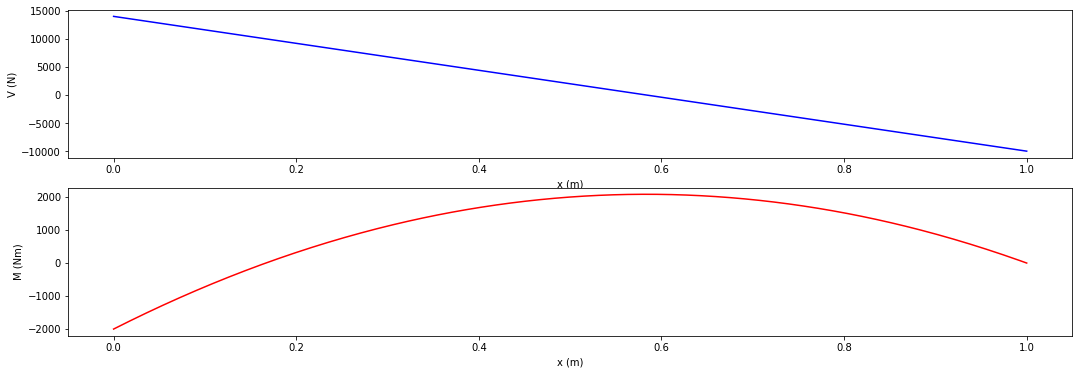

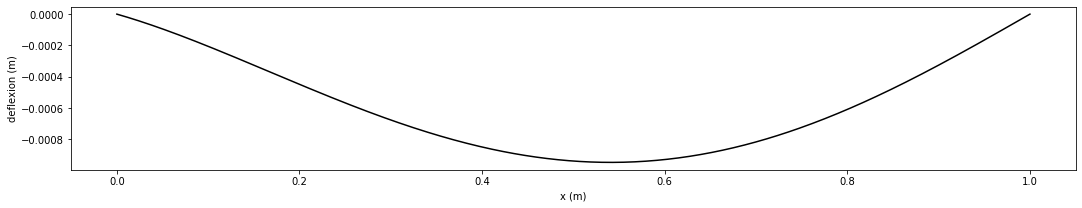

In [ ]:
Xmin= 0 ; Xmax=L; nopto=500 # (Xmin,Xmax,nopto) = (extremo inferior, extremo superior, número de puntos que se pintan)\n",
xx=np.zeros((nopto,1))
vv=np.zeros((nopto,1))
mm=np.zeros((nopto,1))
uu=np.zeros((nopto,1))


for i in range(0,nopto): 
    xx[i] = Xmin+i*(Xmax-Xmin)/(nopto-1) 
    vv[i]=V1.subs([(x,xx[i])])
    mm[i]=M1.subs([(x,xx[i])])
    uu[i]=U1_exp.subs([(x,xx[i])])

        
filename="Nombre de la función"
fig, (ax,ax2) = plt.subplots(2,1,figsize=(18, 6))  # Esto es como decir "Abracadabra! Hágase la figura!". 
                          # Se genera un objeto figura que definimos a continuación

ax.plot(xx,vv, color="blue") # Se le dice a Python, ¡¡¡pinta f(x)!!!
ax.set_xlabel("x (m)") # Nombre y unidades del eje x
ax.set_ylabel("V (N)") # Nombre y unidades del eje y

ax2.plot(xx,mm, color="red") # Se le dice a Python, ¡¡¡pinta f(x)!!!
ax2.set_xlabel("x (m)") # Nombre y unidades del eje x
ax2.set_ylabel("M (Nm)") # Nombre y unidades del eje y

fig2, (ax3) = plt.subplots(1,1,figsize=(18, 3))  # Esto es como decir "Abracadabra! Hágase la figura!". 
                          # Se genera un objeto figura que definimos a continuación

ax3.plot(xx,uu, color="black") # Se le dice a Python, ¡¡¡pinta f(x)!!!
ax3.set_xlabel("x (m)") # Nombre y unidades del eje x
ax3.set_ylabel("deflexion (m)") # Nombre y unidades del eje y

print(" ")
print("El maximo cortante es: ", max(abs(vv)),"N")
print("El maximo flector  es: ", max(abs(mm)),"Nm")
print("La máxima deflexión es: ", max(abs(uu)),"m")

**Calculo de esfuerzos en la sección de interés**


Primero, vamos a calcular los esfuerzos en la sección de interés ($x=0.9$ m):

In [ ]:
L_C=0.9 #coordenada x de la sección de corte donde está el punto C
# momento flector en C
mf= M1.subs([(x,L_C)]); #N*m   
# cortante en C
vy= V1.subs([(x,L_C)]); #N 

print(" ")
print("Los esfuerzos en la sección de interés (x=L_C) son: ", vy,"N y ", mf, "Nm" )
print(" ")    

 
Los esfuerzos en la sección de interés (x=L_C) son:  -7600.00000000000 N y  880.000000000000 Nm
 


**Calculo de tensiones en el punto requerido**

Este código este preparado para calcular las tensiones en una sección genérica en forma de doble-T. Para calcular $\sigma_n$ y $\tau$ en la sección, será necesario especificar el momento flector y cortante máximo (obtenidos arriba), así como la geometría del perfil: parámetros $h$, $b$, $bb$, $e$ y $e1$, en mm.

En este problema, la sección es rectangular. Para conseguir una sección rectangular basta con hacer $b=bb=e$ y $e1=0$. Vamos a imponer estos valores:

In [ ]:
h=200 #altura total en mm
b=25 #anchura en mm
e=25 #espesor del alma en mm
e1=0 #espesor del ala en mm
bb = b;

Y ahora vamos a definir las funciones para la ley de Navier y Collignon que nos permitirán calcular las tensiones normal y tangencial en el punto deseado.

El centro de gravedad del perfil está en (xc,yc)= 0.0 0.0
El momento de inercia de la sección respecto del eje z es= 1666.6666666666665 cm^4
La máxima tension normal es:  [5.28] MPa
La máxima tension cortante es:  [2.27999084] MPa
La tension normal en el punto C es:  -2.64000000000000 MPa
La tension tangencial en el punto C es:  -1.71000000000000 MPa


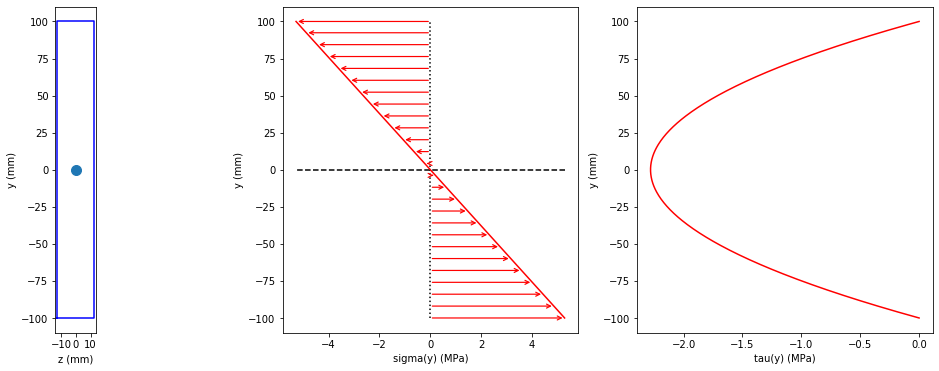

In [ ]:
#--------------------------------------Ley de Navier----------------------------------#
def tensionNa(y,M,I,Yc):        
    return  -(y-Yc)*M/I*1000 #en MPa 
#-------------------------------------------------------------------------------------#


#------------------------------------Ley de Colignon----------------------------------#
def tensionCol(y,V,I,Yc):        
    ymax=h/2
    ymin=-h/2
    y1=ymax-e1
    y2=ymin+e1
    if y>y1:
        return V*Qest(y,Yc)/(I*b)  
    elif y<y1 and y>y2:
        return V*Qest(y,Yc)/(I*e)
    else: #y<y2
        return V*Qest(y,Yc)/(I*bb)
#-------------------------------------------------------------------------------------#

#------------------------------------Momento estático---------------------------------#
def Qest(y,Yc):
    ymax=h/2-Yc
    ymin=-h/2-Yc
    y1=ymax-e1
    y2=ymin+e1
    ya=y-Yc
    if ya>y1:
        return b*(ymax**2.0-ya**2.0)/2
    elif ya<y1 and ya>y2:
        return b*(ymax**2.0-y1**2.0)/2 + e*(y1**2.0-ya**2.0)/2
    else: #y<y2
        return b*(ymax**2.0-y1**2.0)/2 + e*(y1**2.0-y2**2.0)/2 + bb*(y2**2.0-ya**2.0)/2
#-------------------------------------------------------------------------------------#

#-------------------------------------------------------------------------------------#
#----------------------------------------Cálculo--------------------------------------#
#-------------------------------------------------------------------------------------#

# Se genera la geometría del perfil para dibujarla
nopto=13 # (Xmin,Xmax,nopto) = (extremo inferior, extremo superior, número de puntos que se pintan)
xx=np.zeros((nopto,1)) # Una lista (vector) de nopto zeros. Contendrá todos los valores x que se van a utilizar
ff=np.zeros((nopto,1)) # Una lista (vector) de nopto zeros. Contendrá todos los valores de f(x) que se van a pintar

xx[0]=-bb/2
ff[0]=-h/2
xx[1]=-bb/2
ff[1]=-h/2+e1
xx[2]=-e/2
ff[2]=-h/2+e1
xx[3]=-e/2
ff[3]=h/2-e1
xx[4]=-b/2
ff[4]=h/2-e1
xx[5]=-b/2
ff[5]=h/2

for i in range(6,nopto-1):                 # Loop!! La i toma valores en el intervalo [6,nopto-1) (El último valor no se toma)     
    j=i-6
    xx[i] = - xx[5-j]
    ff[i] =   ff[5-j]

xx[12]=xx[0]
ff[12]=ff[0]

# primero se calculan las areas de las 3 partes: ala inferior (1), alma (2) y ala superior (3)
A1=bb*e1
A2=e*(h-2*e1)
A3=b*e1

# y las posiciones de sus c.d.g. 
d1=-h/2+e1/2
d2= 0.0
d3=h/2-e1/2

# se calcula el c.d.g. del perfil
xc=0.0
yc=(A1*d1+ A2*d2 + A3*d3)/(A1+A2+A3) 

print("El centro de gravedad del perfil está en (xc,yc)=",xc,yc)

# se calcula el momento de inercia
# primero, se calculan I de las 3 partes
I1=bb*e1**3/12
I2=e*(h-2*e1)**3/12
I3=b*e1**3/12

# luego se trasladan al c.d.g del perfil utilizando Tª de Steiner
I1=I1+A1*(yc-d1)**2
I2=I2+A2*(yc-d2)**2
I3=I3+A3*(yc-d3)**2

# y se calcula el momento de inercia total
It=I1+I2+I3

print("El momento de inercia de la sección respecto del eje z es=",It/10000,"cm^4")



# se calcula la tensión

Ymin= -h/2 ; Ymax=h/2; nopto=500 # (Xmin,Xmax,nopto) = (extremo inferior, extremo superior, número de puntos que se pintan)\n",
yy=np.zeros((nopto,1)) # Una lista (vector) de nopto zeros. Contendrá todos los valores x que se van a utilizar\n",
ss=np.zeros((nopto,1)) # Una lista (vector) de nopto zeros. Contendrá todos los valores de f(x) que se van a pintar\n",
tt=np.zeros((nopto,1))

for i in range(0,nopto):                 # Loop!! La i toma valores en el intervalo [0,nopto) (El último valor no se toma)     \n",
    yy[i] = Ymin+i*(Ymax-Ymin)/(nopto-1) 
    ss[i]=tensionNa(yy[i],mf,It,yc)
    tt[i]=tensionCol(yy[i],vy,It,yc)

# Se pinta f(x) en función de x
filename="Nombre de la función"
fig, (ax,ax2,ax3) = plt.subplots(1,3,figsize=(18, 6))   
                          
ax.set_aspect('equal', adjustable='box')

ax.plot(xx,ff, color="blue") # Se le dice a Python, ¡¡¡pinta f(x)!!!
ax.plot(xc,yc, 'o', markersize=10)
ax.set_xlabel("z (mm)") # Nombre y unidades del eje x
ax.set_ylabel("y (mm)") # Nombre y unidades del eje y
#ax.legend() # Hace que se pinte la leyenda

ax2.set_xlabel("sigma(y) (MPa)") # Nombre y unidades del eje  x
ax2.set_ylabel("y (mm)") # Nombre y unidades del eje y
ax2.plot((ss[0],ss[nopto-1]),(yc,yc), color="black", linestyle="--") 
ax2.plot((0,0),(-h/2,h/2), color="black", linestyle=":") 
ax2.plot(ss,yy, color="red",linestyle="-") # Se le dice a Python, ¡¡¡pinta f(x)!!!
ax2.annotate("", xy=(ss[nopto-1], h/2), xytext=(0.0, h/2),arrowprops={'arrowstyle':'->','lw': 1.2, 'color': 'r'})
for i in range(0,nopto,20):   
    ax2.annotate("", xy=(ss[i], yy[i]), xytext=(0.0, yy[i]),arrowprops={'arrowstyle':'->','lw': 1.2, 'color': 'r'})

    
ax3.set_xlabel("tau(y) (MPa)") # Nombre y unidades del eje  x
ax3.set_ylabel("y (mm)") # Nombre y unidades del eje y
ax3.plot(tt,yy, color="red",linestyle="-") # Se le dice a Python, ¡¡¡pinta f(x)!!!

print("La máxima tension normal es: ", max(abs(ss)),"MPa")
print("La máxima tension cortante es: ", max(abs(tt)),"MPa")

y_pt=50
print("La tension normal en el punto C es: ",tensionNa(y_pt,mf,It,yc), "MPa")
print("La tension tangencial en el punto C es: ",tensionCol(y_pt,vy,It,yc), "MPa")

**Calculo de las tensiones principales**

Primero definiremos los valores de $\sigma_x$, $\sigma_y$ y $\tau_{xy}$ en el punto C, evaluando las funciones del apartado anterior:

In [ ]:
s_x=float(tensionNa(y_pt,mf,It,yc))  #en MPa, es la tensión de Navier
s_y=0
t_xy=float(tensionCol(y_pt,vy,It,yc))#en MPa, es la tensión de Collignon

Y ahora calcularemos las tensiones principales y direcciones principales:

In [ ]:
def s_x1(theta):        
    return  0.5*(s_x+s_y)+0.5*(s_x-s_y)*cos(2*theta) + t_xy*sin(2*theta)

def t_x1y1(theta):        
    return  -0.5*(s_x-s_y)*sin(2*theta) + t_xy*cos(2*theta)


theta_smax1 =0.5*np.arctan(2.0*t_xy/(s_x-s_y))
theta_smax2 =theta_smax1 + math.pi/2.0

theta_taumax1 =0.5*np.arctan(-(s_x-s_y)/(2.0*t_xy))+math.pi/2
theta_taumax2 = theta_taumax1 + math.pi/2.0 


print("Apartado c.1): Direcciones principales y ensiones principales")
print("")
print("Ángulo plano 2=", theta_smax1*360/(2*math.pi),"º")
print("Ángulo plano 1=", theta_smax2*360/(2*math.pi),"º")
print("La tensión principal asociada al plano con",theta_smax1*360/(2*math.pi),"º es:", s_x1(theta_smax1), " MPa")
print("La tensión principal asociada al plano con",theta_smax2*360/(2*math.pi),"º es:", s_x1(theta_smax2), " MPa")
print("")
print("El ángulo del plano 1 también se puede escribir como un ángulo negativo:", theta_smax2*360/(2*math.pi)-180,"º")

print("")
print("Apartado c.2): Tensiones tangenciales máximas y sus direcciones")
print("Ángulo plano 2=", theta_taumax1*360/(2*math.pi),"º")
print("Ángulo plano 1=", theta_taumax2*360/(2*math.pi),"º")
print("sigma_x1 en ",theta_taumax1*360/(2*math.pi),"º es:", s_x1(theta_taumax1), " MPa")
print("tau_x1y1 en ",theta_taumax1*360/(2*math.pi),"º es:", t_x1y1(theta_taumax1), " MPa")
print("sigma_x1 en ",theta_taumax2*360/(2*math.pi),"º es:", s_x1(theta_taumax2), " MPa")
print("tau_x1y1 en ",theta_taumax2*360/(2*math.pi),"º es:", t_x1y1(theta_taumax2), " MPa")
print("")

Apartado c.1): Direcciones principales y ensiones principales

Ángulo plano 2= 26.167189400708356 º
Ángulo plano 1= 116.16718940070837 º
La tensión principal asociada al plano con 26.167189400708356 º es: -3.48020832328736  MPa
La tensión principal asociada al plano con 116.16718940070837 º es: 0.840208323287363  MPa

El ángulo del plano 1 también se puede escribir como un ángulo negativo: -63.83281059929163 º

Apartado c.2): Tensiones tangenciales máximas y sus direcciones
Ángulo plano 2= 71.16718940070834 º
Ángulo plano 1= 161.16718940070834 º
sigma_x1 en  71.16718940070834 º es: -1.32000000000000  MPa
tau_x1y1 en  71.16718940070834 º es: 2.16020832328736  MPa
sigma_x1 en  161.16718940070834 º es: -1.32000000000000  MPa
tau_x1y1 en  161.16718940070834 º es: -2.16020832328736  MPa



**Repetimos los apartados anteriores para una sección en T**

Con $b=150$ mm, $h= 200$ mm y $e=e_1=30$ mm

In [ ]:
h=200 #altura total en mm
b=150 #anchura en mm
e=30 #espesor del alma en mm
e1=30 #espesor del ala en mm
bb = e;

El centro de gravedad del perfil está en (xc,yc)= 0.0 31.875
El momento de inercia de la sección respecto del eje z es= 3652.625 cm^4
La máxima tension normal es:  [3.17716711] MPa
La máxima tension cortante es:  [1.80927029] MPa
La tension normal en el punto C es:  -0.436672256254064 MPa
La tension tangencial en el punto C es:  -1.77509325485096 MPa


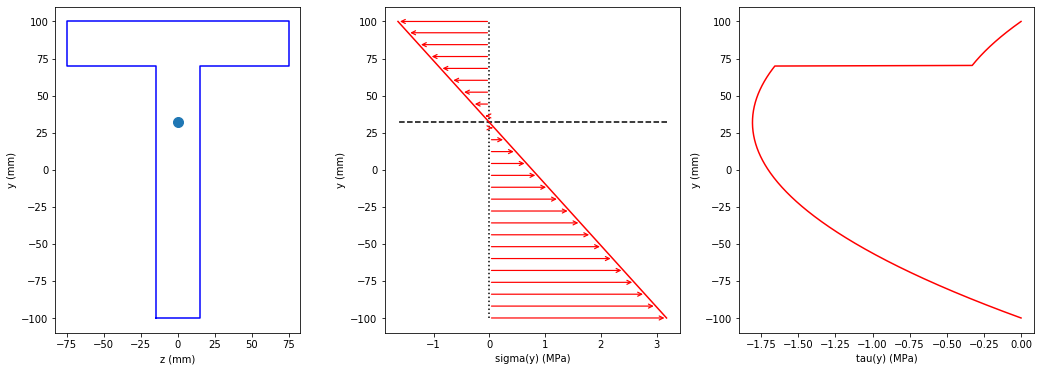

In [ ]:
#--------------------------------------Ley de Navier----------------------------------#
def tensionNa(y,M,I,Yc):        
    return  -(y-Yc)*M/I*1000 #en MPa 
#-------------------------------------------------------------------------------------#


#------------------------------------Ley de Colignon----------------------------------#
def tensionCol(y,V,I,Yc):        
    ymax=h/2
    ymin=-h/2
    y1=ymax-e1
    y2=ymin+e1
    if y>y1:
        return V*Qest(y,Yc)/(I*b)  
    elif y<y1 and y>y2:
        return V*Qest(y,Yc)/(I*e)
    else: #y<y2
        return V*Qest(y,Yc)/(I*bb)
#-------------------------------------------------------------------------------------#

#------------------------------------Momento estático---------------------------------#
def Qest(y,Yc):
    ymax=h/2-Yc
    ymin=-h/2-Yc
    y1=ymax-e1
    y2=ymin+e1
    ya=y-Yc
    if ya>y1:
        return b*(ymax**2.0-ya**2.0)/2
    elif ya<y1 and ya>y2:
        return b*(ymax**2.0-y1**2.0)/2 + e*(y1**2.0-ya**2.0)/2
    else: #y<y2
        return b*(ymax**2.0-y1**2.0)/2 + e*(y1**2.0-y2**2.0)/2 + bb*(y2**2.0-ya**2.0)/2
#-------------------------------------------------------------------------------------#

#-------------------------------------------------------------------------------------#
#----------------------------------------Cálculo--------------------------------------#
#-------------------------------------------------------------------------------------#

# Se genera la geometría del perfil para dibujarla
nopto=13 # (Xmin,Xmax,nopto) = (extremo inferior, extremo superior, número de puntos que se pintan)
xx=np.zeros((nopto,1)) # Una lista (vector) de nopto zeros. Contendrá todos los valores x que se van a utilizar
ff=np.zeros((nopto,1)) # Una lista (vector) de nopto zeros. Contendrá todos los valores de f(x) que se van a pintar

xx[0]=-bb/2
ff[0]=-h/2
xx[1]=-bb/2
ff[1]=-h/2+e1
xx[2]=-e/2
ff[2]=-h/2+e1
xx[3]=-e/2
ff[3]=h/2-e1
xx[4]=-b/2
ff[4]=h/2-e1
xx[5]=-b/2
ff[5]=h/2

for i in range(6,nopto-1):                 # Loop!! La i toma valores en el intervalo [6,nopto-1) (El último valor no se toma)     
    j=i-6
    xx[i] = - xx[5-j]
    ff[i] =   ff[5-j]

xx[12]=xx[0]
ff[12]=ff[0]

# primero se calculan las areas de las 3 partes: ala inferior (1), alma (2) y ala superior (3)
A1=bb*e1
A2=e*(h-2*e1)
A3=b*e1

# y las posiciones de sus c.d.g. 
d1=-h/2+e1/2
d2= 0.0
d3=h/2-e1/2

# se calcula el c.d.g. del perfil
xc=0.0
yc=(A1*d1+ A2*d2 + A3*d3)/(A1+A2+A3) 

print("El centro de gravedad del perfil está en (xc,yc)=",xc,yc)

# se calcula el momento de inercia
# primero, se calculan I de las 3 partes
I1=bb*e1**3/12
I2=e*(h-2*e1)**3/12
I3=b*e1**3/12

# luego se trasladan al c.d.g del perfil utilizando Tª de Steiner
I1=I1+A1*(yc-d1)**2
I2=I2+A2*(yc-d2)**2
I3=I3+A3*(yc-d3)**2

# y se calcula el momento de inercia total
It=I1+I2+I3

print("El momento de inercia de la sección respecto del eje z es=",It/10000,"cm^4")



# se calcula la tensión

Ymin= -h/2 ; Ymax=h/2; nopto=500 # (Xmin,Xmax,nopto) = (extremo inferior, extremo superior, número de puntos que se pintan)\n",
yy=np.zeros((nopto,1)) # Una lista (vector) de nopto zeros. Contendrá todos los valores x que se van a utilizar\n",
ss=np.zeros((nopto,1)) # Una lista (vector) de nopto zeros. Contendrá todos los valores de f(x) que se van a pintar\n",
tt=np.zeros((nopto,1))

for i in range(0,nopto):                 # Loop!! La i toma valores en el intervalo [0,nopto) (El último valor no se toma)     \n",
    yy[i] = Ymin+i*(Ymax-Ymin)/(nopto-1) 
    ss[i]=tensionNa(yy[i],mf,It,yc)
    tt[i]=tensionCol(yy[i],vy,It,yc)

# Se pinta f(x) en función de x
filename="Nombre de la función"
fig, (ax,ax2,ax3) = plt.subplots(1,3,figsize=(18, 6))   
                          
ax.set_aspect('equal', adjustable='box')

ax.plot(xx,ff, color="blue") # Se le dice a Python, ¡¡¡pinta f(x)!!!
ax.plot(xc,yc, 'o', markersize=10)
ax.set_xlabel("z (mm)") # Nombre y unidades del eje x
ax.set_ylabel("y (mm)") # Nombre y unidades del eje y
#ax.legend() # Hace que se pinte la leyenda

ax2.set_xlabel("sigma(y) (MPa)") # Nombre y unidades del eje  x
ax2.set_ylabel("y (mm)") # Nombre y unidades del eje y
ax2.plot((ss[0],ss[nopto-1]),(yc,yc), color="black", linestyle="--") 
ax2.plot((0,0),(-h/2,h/2), color="black", linestyle=":") 
ax2.plot(ss,yy, color="red",linestyle="-") # Se le dice a Python, ¡¡¡pinta f(x)!!!
ax2.annotate("", xy=(ss[nopto-1], h/2), xytext=(0.0, h/2),arrowprops={'arrowstyle':'->','lw': 1.2, 'color': 'r'})
for i in range(0,nopto,20):   
    ax2.annotate("", xy=(ss[i], yy[i]), xytext=(0.0, yy[i]),arrowprops={'arrowstyle':'->','lw': 1.2, 'color': 'r'})

    
ax3.set_xlabel("tau(y) (MPa)") # Nombre y unidades del eje  x
ax3.set_ylabel("y (mm)") # Nombre y unidades del eje y
ax3.plot(tt,yy, color="red",linestyle="-") # Se le dice a Python, ¡¡¡pinta f(x)!!!

print("La máxima tension normal es: ", max(abs(ss)),"MPa")
print("La máxima tension cortante es: ", max(abs(tt)),"MPa")

y_pt=50
print("La tension normal en el punto C es: ",tensionNa(y_pt,mf,It,yc), "MPa")
print("La tension tangencial en el punto C es: ",tensionCol(y_pt,vy,It,yc), "MPa")

In [ ]:
s_x=float(tensionNa(y_pt,mf,It,yc))  #en MPa, es la tensión de Navier
s_y=0
t_xy=float(tensionCol(y_pt,vy,It,yc))#en MPa, es la tensión de Collignon

In [ ]:
def s_x1(theta):        
    return  0.5*(s_x+s_y)+0.5*(s_x-s_y)*cos(2*theta) + t_xy*sin(2*theta)

def t_x1y1(theta):        
    return  -0.5*(s_x-s_y)*sin(2*theta) + t_xy*cos(2*theta)


theta_smax1 =0.5*np.arctan(2.0*t_xy/(s_x-s_y))
theta_smax2 =theta_smax1 + math.pi/2.0

theta_taumax1 =0.5*np.arctan(-(s_x-s_y)/(2.0*t_xy))+math.pi/2
theta_taumax2 = theta_taumax1 + math.pi/2.0 


print("Apartado c.1): Direcciones principales y ensiones principales")
print("")
print("Ángulo plano 2=", theta_smax1*360/(2*math.pi),"º")
print("Ángulo plano 1=", theta_smax2*360/(2*math.pi),"º")
print("La tensión principal asociada al plano con",theta_smax1*360/(2*math.pi),"º es:", s_x1(theta_smax1), " MPa")
print("La tensión principal asociada al plano con",theta_smax2*360/(2*math.pi),"º es:", s_x1(theta_smax2), " MPa")
print("")
print("El ángulo del plano 1 también se puede escribir como un ángulo negativo:", theta_smax2*360/(2*math.pi)-180,"º")

print("")
print("Apartado c.2): Tensiones tangenciales máximas y sus direcciones")
print("Ángulo plano 2=", theta_taumax1*360/(2*math.pi),"º")
print("Ángulo plano 1=", theta_taumax2*360/(2*math.pi),"º")
print("sigma_x1 en ",theta_taumax1*360/(2*math.pi),"º es:", s_x1(theta_taumax1), " MPa")
print("tau_x1y1 en ",theta_taumax1*360/(2*math.pi),"º es:", t_x1y1(theta_taumax1), " MPa")
print("sigma_x1 en ",theta_taumax2*360/(2*math.pi),"º es:", s_x1(theta_taumax2), " MPa")
print("tau_x1y1 en ",theta_taumax2*360/(2*math.pi),"º es:", t_x1y1(theta_taumax2), " MPa")
print("")

Apartado c.1): Direcciones principales y ensiones principales

Ángulo plano 2= 41.49392538927736 º
Ángulo plano 1= 131.49392538927736 º
La tensión principal asociada al plano con 41.49392538927736 º es: -2.00680662781745  MPa
La tensión principal asociada al plano con 131.49392538927736 º es: 1.57013437156339  MPa

El ángulo del plano 1 también se puede escribir como un ángulo negativo: -48.506074610722635 º

Apartado c.2): Tensiones tangenciales máximas y sus direcciones
Ángulo plano 2= 86.49392538927735 º
Ángulo plano 1= 176.49392538927734 º
sigma_x1 en  86.49392538927735 º es: -0.218336128127032  MPa
tau_x1y1 en  86.49392538927735 º es: 1.78847049969042  MPa
sigma_x1 en  176.49392538927734 º es: -0.218336128127030  MPa
tau_x1y1 en  176.49392538927734 º es: -1.78847049969042  MPa



**El apartado h) se deja como ejercicio**